# Prep Stuff

In [190]:
drive_path = 'd:/'

In [291]:
import numpy as np
import pandas as pd
import os
import sys
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import variation

In [192]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.stimulus_analysis import StimulusAnalysis
from allensdk.brain_observatory.findlevel import findlevel

manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

In [193]:
#only get the sessions that contain the natural scenes: 79 sessions
expMetaData = pd.DataFrame(boc.get_ophys_experiments())
SessionThreeMD = expMetaData[expMetaData.session_type=='three_session_B']

In [204]:
SessionThreeMD.sort_values('experiment_container_id')

,age_days,cre_line,experiment_container_id,id,imaging_depth,session_type,targeted_structure
44,101.0,Cux2-CreERT2,511498500,510518066,275,three_session_B,VISpm
76,98.0,Scnn1a-Tg3-Cre,511498742,511434920,350,three_session_B,VISp
70,86.0,Rbp4-Cre,511499656,510938357,375,three_session_B,VISal
208,93.0,Rorb-IRES2-Cre,511500480,511458599,275,three_session_B,VISal
59,123.0,Rorb-IRES2-Cre,511506664,500947031,275,three_session_B,VISp
205,123.0,Rorb-IRES2-Cre,511507144,496908818,275,three_session_B,VISp
56,123.0,Rorb-IRES2-Cre,511507602,497256116,275,three_session_B,VISpm
23,156.0,Cux2-CreERT2,511507650,501794235,175,three_session_B,VISp
63,151.0,Scnn1a-Tg3-Cre,511507811,500860585,350,three_session_B,VISp
173,144.0,Cux2-CreERT2,511509529,500964514,175,three_session_B,VISp


In [195]:
#lists every cell in all of the sessions: 18260 cells
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)

,area,cell_specimen_id,dsi_dg,experiment_container_id,imaging_depth,osi_dg,osi_sg,p_dg,p_ns,p_sg,...,pref_sf_sg,pref_tf_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
0,VISpm,517394843,NaN,511498500,275,NaN,0.728590,NaN,2.644073e-05,7.609728e-05,...,0.32,NaN,0.29925,0.19950,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
1,VISpm,517394850,NaN,511498500,275,NaN,0.899272,NaN,3.568235e-04,5.657906e-02,...,0.32,NaN,0.43225,0.56525,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
2,VISpm,517394858,0.592835,511498500,275,1.150344,NaN,2.900487e-03,NaN,NaN,...,NaN,8.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
3,VISpm,517394866,0.599360,511498500,275,0.745139,NaN,3.688659e-06,NaN,NaN,...,NaN,8.0,NaN,NaN,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
4,VISpm,517394870,NaN,511498500,275,NaN,0.599881,NaN,3.334354e-07,6.786776e-02,...,0.02,NaN,0.23275,0.39900,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
5,VISpm,517394874,NaN,511498500,275,NaN,1.352794,NaN,5.703620e-08,2.539611e-03,...,0.08,NaN,0.19950,0.43225,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
6,VISpm,517394878,NaN,511498500,275,NaN,2.050385,NaN,8.888435e-09,6.075408e-03,...,0.32,NaN,0.26600,0.00000,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
7,VISpm,517394882,NaN,511498500,275,NaN,2.341990,NaN,3.013356e-02,6.160867e-03,...,0.32,NaN,0.13300,0.43225,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
8,VISpm,517394886,NaN,511498500,275,NaN,1.167408,NaN,1.951184e-02,3.235150e-01,...,0.02,NaN,0.19950,0.43225,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
9,VISpm,517394890,NaN,511498500,275,NaN,1.078089,NaN,1.191174e-07,5.100207e-06,...,0.04,NaN,0.49875,0.16625,177839004,Cux2-CreERT2,177837320,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


# Get Stuff from one experiment

In [214]:
#Choose an experiment
expContainerID = SessionThreeMD.id[44]
print expContainerID
exp=boc.get_ophys_experiment_data(ophys_experiment_id = expContainerID)

510518066


In [215]:
#all of the cell specimen ids in this experiment
expcells=exp.get_cell_specimen_ids()

In [216]:
#Don't really need this
#pick one cell from the list of cells in this experiment
#cell_specimen_id=expcells[1]

In [358]:
# order of all of the stimuli for this experiment
naturalscenelist=exp.get_stimulus_table('natural_scenes')
naturalscenelist

,frame,start,end
0,117,16098,16105
1,80,16106,16113
2,49,16113,16120
3,104,16121,16128
4,73,16128,16135
5,80,16136,16143
6,70,16143,16150
7,22,16151,16158
8,45,16158,16165
9,105,16166,16173


# Gives COV for all stimuli from one experiment

In [408]:
#NS (natural scene) mean sweep response = mean df/f over 1second calculated by Allen, columns = cell, rows = trial number
NS_alt = pd.read_csv('mean_sweep_response.csv')
NS_alt

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,dx
0,5.952777,5.919717,2.875329,1.215661,0.057969,-0.522827,6.021945,0.865095,4.891380,2.073973,...,1.466771,-4.634409,9.807891,0.001123,4.687271,3.006371,0.786760,8.280050,3.290543,-0.120032
1,9.691055,7.203629,4.119640,0.345694,4.368604,0.433720,9.276838,5.197964,5.319397,6.318133,...,-0.087996,0.680603,16.565594,-1.959205,6.103164,5.065122,3.245332,7.688806,1.844579,-0.076688
2,6.293092,0.933057,2.531034,2.165378,5.095929,0.588807,4.046335,5.240430,0.690385,4.613018,...,-0.855334,2.656682,3.774314,-9.608886,0.966809,2.203763,4.445071,0.896066,-0.450431,-0.009188
3,-0.192006,-1.605794,-0.611917,0.797951,2.502253,-1.723708,-1.104768,5.894948,-2.264323,8.988823,...,-2.093123,-0.607416,-7.115607,4.791955,-4.134358,-0.359975,3.334413,-4.140265,-4.527466,-0.056880
4,-5.332043,-4.534470,-2.905243,-1.342171,-1.900052,19.219366,-2.190243,3.382367,-3.576029,2.667526,...,-2.956945,3.066562,-10.799028,25.598980,-6.445162,-3.561411,1.276237,-6.343560,-2.781956,-0.075218
5,-8.197835,-6.739945,-4.945812,-1.045539,-6.022680,32.465752,-1.059624,42.666271,-0.925655,-5.529069,...,-3.207463,3.107325,-6.138684,7.462718,-5.691776,-5.447705,-6.925447,-6.162549,1.003934,0.094033
6,-6.969195,-5.677513,-4.735251,-4.955486,-6.626766,37.012543,-2.024417,76.445656,7.289837,-4.356719,...,-0.622528,3.368451,-2.777187,-3.802509,-4.784321,-3.798110,-10.868437,-5.978440,1.341910,0.017337
7,-3.022153,-2.148929,-0.983225,-3.317319,8.812530,44.979980,-3.812517,25.045902,2.381548,-6.838468,...,-0.035010,6.822741,-5.519094,-13.120415,-3.926804,-3.493153,-11.064866,-3.828311,3.031193,0.143315
8,-0.537001,0.833654,-1.852359,-2.521207,24.177341,-3.204366,-2.037875,-3.451514,-5.089084,-8.866579,...,-3.725093,-2.144698,-6.346344,-14.032030,-3.785895,-2.900776,-10.117342,-3.346378,-0.889222,0.012518
9,0.192489,0.628130,1.068310,-2.025165,6.833678,-22.672596,-0.256373,-19.346857,2.487681,-7.748689,...,-1.359996,-8.105035,-4.605152,-7.067251,-2.240782,-0.626429,-5.297704,-3.498912,-1.541491,0.021874


In [413]:
framelist=pd.DataFrame(naturalscenelist.frame)
full=[framelist,NS_alt]
fullexpDF=pd.concat(full,axis=1)
fullexpDF
np.unique(framelist)
len(framelist)

5950

In [411]:
groupedFrame=fullexpDF.groupby('frame')
groupedFrame.last()
type(groupedFrame)

pandas.core.groupby.DataFrameGroupBy

In [416]:
#Gives you all the stats
groupedFrame.describe()

0          1          10        100        101  \
frame                                                                 
-1    count  50.000000  50.000000   50.000000  50.000000  50.000000   
      mean    0.882077  -0.125055   -1.179383   0.471689  -0.955607   
      std     9.713202   2.142268    3.107776   5.173669   5.794471   
      min    -7.682557  -5.867597  -12.211078  -9.155828 -20.477354   
      25%    -1.728352  -1.424140   -2.004981  -2.017830  -2.443302   
      50%    -0.700309  -0.074232   -0.949078   0.287418  -1.080678   
      75%     0.735039   1.127180    0.392584   2.218690   0.860713   
      max    65.044876   4.377552    7.320364  30.087933  16.947031   
 0    count  50.000000  50.000000   50.000000  50.000000  50.000000   
      mean   -0.366944   0.195154   -0.459775  -1.568195   0.241696   
      std     4.167516   2.534209    3.144323   4.828895   5.116320   
      min   -16.707111  -4.169117  -14.095679 -23.876434 -11.953386   
      25%    -1.851731  -1.135553   -1.607160  -2.486112  -1.788404   
      50%    -0.280657  -0.113075   -0.349661  -0.512081   0.035570   
      75%     1.211772   0.900289    0.948390   0.837802   1.551206   
      max     8.439791   8.777266    5.621634   6.877006  18.495924   
 1    count  50.000000  50.000000   50.000000  50.000000  50.000000   
      mean    0.123421  -0.111004    0.484339  -0.555156   0.820227   
      std     3.145912   2.754983   10.014189   2.796103   4.437039   
      min    -7.070006  -6.481713  -31.505848 -10.293513  -6.462288   
      25%    -1.761090  -1.621440   -1.027753  -1.962118  -1.871625   
      50%    -0.057626  -0.588242   -0.179734  -0.148733   0.401526   
      75%     2.079692   0.909424    1.824441   1.159989   1.989545   
      max     9.949616   9.410729   52.906982   4.039417  15.569661   
 2    count  50.000000  50.000000   50.000000  50.000000  50.000000   
      mean   -0.860528   0.475528   -1.137527   1.087393   1.219608   
      std     3.212255   3.076643    5.115468  12.114401   5.114549   
      min   -10.084604  -5.118686  -22.916367  -5.297235  -9.418071   
      25%    -2.672792  -1.363158   -1.805880  -1.847079  -1.686433   
      50%    -0.242046  -0.051017   -0.515474  -0.784693   0.740024   
...                ...        ...         ...        ...        ...   
 114  std     3.202992   2.443368   15.748136   2.930611   2.849478   
      min    -9.316811  -6.756944  -10.380450  -9.195608  -9.908713   
      25%    -1.429362  -1.203957   -1.226495  -2.078699  -2.244609   
      50%    -0.477432   0.313491    0.621644  -0.546115  -0.515231   
      75%     1.377041   1.333208    1.553374   0.954567   0.941832   
      max    13.792559   7.285361  109.409241   6.574033   5.901028   
 115  count  50.000000  50.000000   50.000000  50.000000  50.000000   
      mean    0.519849   0.016483    0.707960  -0.972623   4.051562   
      std     3.231627   2.287712    3.214091   3.097406  12.504665   
      min    -7.594008  -3.081200   -5.398117 -12.817817  -3.518770   
      25%    -1.544655  -1.693531   -0.499761  -2.268469  -0.819739   
      50%     0.431146  -0.298039    0.367178  -0.520895   1.124065   
      75%     2.007383   1.334221    1.162928   0.983633   3.020503   
      max    13.601085   7.916303   14.359630   3.675358  58.267010   
 116  count  50.000000  50.000000   50.000000  50.000000  50.000000   
      mean    1.512701  -0.042124    0.081350  -2.108692  -0.225097   
      std    10.452188   2.275657    2.777132   6.944411   2.836393   
      min    -5.681185  -6.917731   -6.019595 -28.643930  -9.040854   
      25%    -1.368302  -1.259089   -1.702807  -2.504615  -1.834173   
      50%    -0.105796  -0.297546   -0.150230  -0.236041  -0.467243   
      75%     1.634403   1.488845    2.050427   1.105953   1.318027   
      max    71.194168   4.662438    7.811441   6.396518  10.699105   
 117  count  50.000000  50.000000   50.000000  50.000000  50.000000   
      mean    0.134602   0.909448    0.733483

In [479]:
SortedGFData.to_csv('SortedGFData_510518066.csv',index=False)

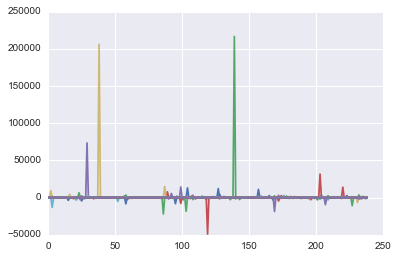

In [478]:
plt.plot(SortedGFData)

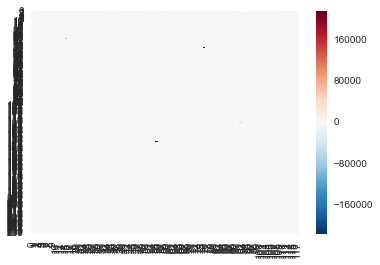

In [477]:
ax=seaborn.heatmap(SortedGFData,vm)

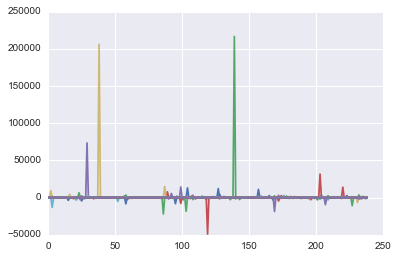

In [475]:
plt.plot(SortedGFData)

# Gives COV for a single stimulus from a single experiment

In [218]:
#gives all trials for a single stimulus.
#REMEMBER not all stimuli have every trial
image1=naturalscenelist[naturalscenelist.frame==1]
len(image1)

50

In [239]:
#naturalscenelist.keys()

Index([u'frame', u'start', u'end'], dtype='object')

In [264]:
#Pick one scene/stimulus
nsl1=naturalscenelist[naturalscenelist.frame==1]
nslindex=nsl1.index

In [234]:
#NS (natural scene) mean sweep response = mean df/f over 1second calculated by Allen, columns = cell, rows = trial number
NS_alt = pd.read_csv('mean_sweep_response.csv')
NS_alt

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,dx
0,5.952777,5.919717,2.875329,1.215661,0.057969,-0.522827,6.021945,0.865095,4.891380,2.073973,...,1.466771,-4.634409,9.807891,0.001123,4.687271,3.006371,0.786760,8.280050,3.290543,-0.120032
1,9.691055,7.203629,4.119640,0.345694,4.368604,0.433720,9.276838,5.197964,5.319397,6.318133,...,-0.087996,0.680603,16.565594,-1.959205,6.103164,5.065122,3.245332,7.688806,1.844579,-0.076688
2,6.293092,0.933057,2.531034,2.165378,5.095929,0.588807,4.046335,5.240430,0.690385,4.613018,...,-0.855334,2.656682,3.774314,-9.608886,0.966809,2.203763,4.445071,0.896066,-0.450431,-0.009188
3,-0.192006,-1.605794,-0.611917,0.797951,2.502253,-1.723708,-1.104768,5.894948,-2.264323,8.988823,...,-2.093123,-0.607416,-7.115607,4.791955,-4.134358,-0.359975,3.334413,-4.140265,-4.527466,-0.056880
4,-5.332043,-4.534470,-2.905243,-1.342171,-1.900052,19.219366,-2.190243,3.382367,-3.576029,2.667526,...,-2.956945,3.066562,-10.799028,25.598980,-6.445162,-3.561411,1.276237,-6.343560,-2.781956,-0.075218
5,-8.197835,-6.739945,-4.945812,-1.045539,-6.022680,32.465752,-1.059624,42.666271,-0.925655,-5.529069,...,-3.207463,3.107325,-6.138684,7.462718,-5.691776,-5.447705,-6.925447,-6.162549,1.003934,0.094033
6,-6.969195,-5.677513,-4.735251,-4.955486,-6.626766,37.012543,-2.024417,76.445656,7.289837,-4.356719,...,-0.622528,3.368451,-2.777187,-3.802509,-4.784321,-3.798110,-10.868437,-5.978440,1.341910,0.017337
7,-3.022153,-2.148929,-0.983225,-3.317319,8.812530,44.979980,-3.812517,25.045902,2.381548,-6.838468,...,-0.035010,6.822741,-5.519094,-13.120415,-3.926804,-3.493153,-11.064866,-3.828311,3.031193,0.143315
8,-0.537001,0.833654,-1.852359,-2.521207,24.177341,-3.204366,-2.037875,-3.451514,-5.089084,-8.866579,...,-3.725093,-2.144698,-6.346344,-14.032030,-3.785895,-2.900776,-10.117342,-3.346378,-0.889222,0.012518
9,0.192489,0.628130,1.068310,-2.025165,6.833678,-22.672596,-0.256373,-19.346857,2.487681,-7.748689,...,-1.359996,-8.105035,-4.605152,-7.067251,-2.240782,-0.626429,-5.297704,-3.498912,-1.541491,0.021874


In [287]:
#Mean response for all cells for one natural scene stimulus
SingleNS=NS_alt.loc[nslindex]

In [321]:
SingleNSCOV=pd.DataFrame(variation(SingleNS,axis=0))

(array([   3.,  233.,    1.,    0.,    0.,    0.,    0.,    0.,    1.,    1.]),
 array([ -430.96525432,  -118.42116388,   194.12292655,   506.66701699,
          819.21110743,  1131.75519787,  1444.29928831,  1756.84337875,
         2069.38746919,  2381.93155962,  2694.47565006]),
 <a list of 10 Patch objects>)

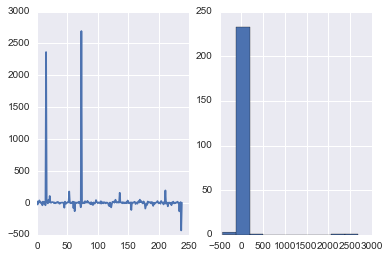

In [324]:
fig,ax=plt.subplots(ncols=2)3

ax[0].plot(SingleNSCOV)
ax[1].hist(SingleNSCOV)

In [219]:
#from allensdk.brain_observatory.natural_scenes import NaturalScenes

In [220]:
#NS=NaturalScenes(exp)
#NS

In [229]:
#help(pickle.dump)

Help on function dump in module pickle:

dump(obj, file, protocol=None)



In [230]:
#THIS DOES NOT WORK
#import pickle

#f = open('NS_cache.pkl','w')
#pickle.dump(NS,f)

#f.close()
#f = open('NS_cache.pkl','r')
#NS=pickle.load(f)

KeyboardInterrupt: 

In [233]:
#NS.mean_sweep_response.to_csv('mean_sweep_response.csv',index=False)

In [227]:
#NS.mean_sweep_response

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,dx
0,5.952777,5.919717,2.875329,1.215661,0.057969,-0.522827,6.021945,0.865095,4.891380,2.073973,...,1.466771,-4.634409,9.807891,0.001123,4.687271,3.006371,0.786760,8.280050,3.290543,-0.120032
1,9.691055,7.203629,4.119640,0.345694,4.368604,0.433720,9.276838,5.197964,5.319397,6.318133,...,-0.087996,0.680603,16.565594,-1.959205,6.103164,5.065122,3.245332,7.688806,1.844579,-0.076688
2,6.293092,0.933057,2.531034,2.165378,5.095929,0.588807,4.046335,5.240430,0.690385,4.613018,...,-0.855334,2.656682,3.774314,-9.608886,0.966809,2.203763,4.445071,0.896066,-0.450431,-0.009188
3,-0.192006,-1.605794,-0.611917,0.797951,2.502253,-1.723708,-1.104768,5.894948,-2.264323,8.988823,...,-2.093123,-0.607416,-7.115607,4.791955,-4.134358,-0.359975,3.334413,-4.140265,-4.527466,-0.056880
4,-5.332043,-4.534470,-2.905243,-1.342171,-1.900052,19.219366,-2.190243,3.382367,-3.576029,2.667526,...,-2.956945,3.066562,-10.799028,25.598980,-6.445162,-3.561411,1.276237,-6.343560,-2.781956,-0.075218
5,-8.197835,-6.739945,-4.945812,-1.045539,-6.022680,32.465752,-1.059624,42.666271,-0.925655,-5.529069,...,-3.207463,3.107325,-6.138684,7.462718,-5.691776,-5.447705,-6.925447,-6.162549,1.003934,0.094033
6,-6.969195,-5.677513,-4.735251,-4.955486,-6.626766,37.012543,-2.024417,76.445656,7.289837,-4.356719,...,-0.622528,3.368451,-2.777187,-3.802509,-4.784321,-3.798110,-10.868437,-5.978440,1.341910,0.017337
7,-3.022153,-2.148929,-0.983225,-3.317319,8.812530,44.979980,-3.812517,25.045902,2.381548,-6.838468,...,-0.035010,6.822741,-5.519094,-13.120415,-3.926804,-3.493153,-11.064866,-3.828311,3.031193,0.143315
8,-0.537001,0.833654,-1.852359,-2.521207,24.177341,-3.204366,-2.037875,-3.451514,-5.089084,-8.866579,...,-3.725093,-2.144698,-6.346344,-14.032030,-3.785895,-2.900776,-10.117342,-3.346378,-0.889222,0.012518
9,0.192489,0.628130,1.068310,-2.025165,6.833678,-22.672596,-0.256373,-19.346857,2.487681,-7.748689,...,-1.359996,-8.105035,-4.605152,-7.067251,-2.240782,-0.626429,-5.297704,-3.498912,-1.541491,0.021874
